In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()


In [2]:
from libs.distributions.exp_dist import ExpDist
from libs.estimators.mle_estimator import MLE
from libs.estimators.map_estimator import MAP
from libs.estimators.mse_estimator import MSE

In [3]:
input_variables = {
    # Input for generating exponential distribution
    "size": 1000, # total number of data
    "lam": 0.2, # lambda value
    "st_range": 1, # start of range data
    "loc": 0,
    "alpha": 30,
    "beta": 100
}


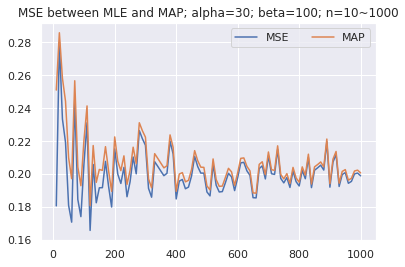

In [6]:
data = ExpDist(**input_variables)
max_loop = 50
max_alpha = 30
max_n = 1000
n_stepsize = 10 # n start from 10, and increase every 10 ->> n = 10, 20, 30, ... 1000 
x = []
y = []
# print(" ***** y = ", len(y), y)
for n in range(10, (max_n+n_stepsize), n_stepsize):
    data.regenerate_dataset(n_size=n)
    
    x.append(n)
    input_variables["size"] = n
    mle_est = MLE(ext_dataset=data, **input_variables)
    map_est = MAP(ext_dataset=data, **input_variables)

    mle_est.multiple_run(max_loop, data)
    mle_yhat = mle_est.get_array_yhat()
    mean_mle = np.mean(mle_yhat)

    map_est.multiple_run(max_loop, data=data)
    map_yhat = map_est.get_array_yhat()
    mean_map = np.mean(map_yhat)

    y.append([mean_mle, mean_map])
    
x = np.array(x)
y = np.array(y)

plt.plot(x, y)
plt.title("MSE between MLE and MAP; alpha=30; beta=100; n=10~1000")
labels = ['MSE', 'MAP']
plt.legend(labels, ncol=2, loc='upper right');
